In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(color_codes = True)
import warnings
warnings.filterwarnings('ignore')

In [13]:
pima = pd.read_csv('/content/pima-indians-diabetes-1.csv')
pima

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [14]:
pima.head()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [15]:
pima.shape

(768, 9)

In [16]:
pima.dtypes

Preg       int64
Plas       int64
Pres       int64
skin       int64
test       int64
mass     float64
pedi     float64
age        int64
class      int64
dtype: object

In [17]:
pima.isnull().values.any()

False

In [18]:
pima.describe().T

,count,mean,std,min,25%,50%,75%,max
Preg,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Plas,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
Pres,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
skin,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
test,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
mass,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
pedi,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
class,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


Text(0, 0.5, 'Number of People')

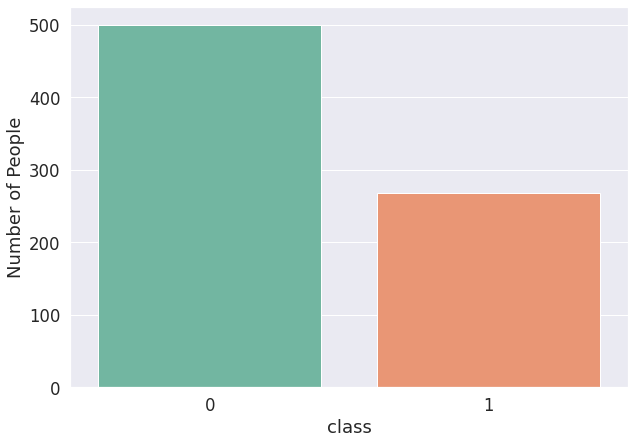

In [19]:
plt.figure(figsize=(10,7))
sns.set(font_scale = 1.5)
sns.countplot(x = 'class', data=pima, palette="Set2")
plt.ylabel('Number of People')

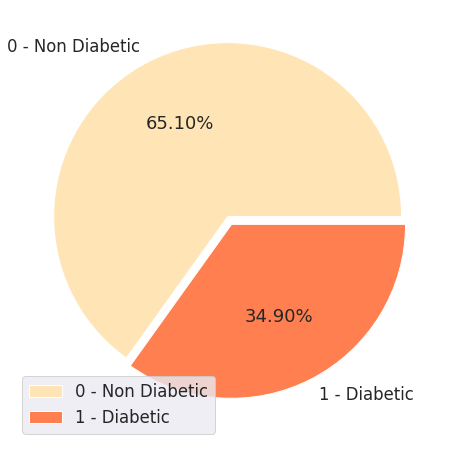

In [20]:
plt.figure(figsize=(8,8))
pieC = pima['class'].value_counts()
explode = (0.05, 0)
colors = ['moccasin', 'coral']
labels = ['0 - Non Diabetic', '1 - Diabetic']
sns.set(font_scale = 1.5)
plt.pie(pieC, labels = ('0 - Non Diabetic', '1 - Diabetic'), autopct = "%.2f%%", explode = explode, colors = colors)
plt.legend(labels, loc = 'lower left')

In [21]:
pima[pima['Plas'] == 0]

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
75,1,0,48,20,0,24.7,0.140,22,0
182,1,0,74,20,23,27.7,0.299,21,0
342,1,0,68,35,0,32.0,0.389,22,0
349,5,0,80,32,0,41.0,0.346,37,1
502,6,0,68,41,0,39.0,0.727,41,1


In [22]:
missingPlas = pima[pima['Plas'] == 0].shape[0]
print ("Number of zeros in variable Plas (Glucose): ", missingPlas)

Number of zeros in variable Plas (Glucose):  5


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0da1389310>,
      dtype=object)

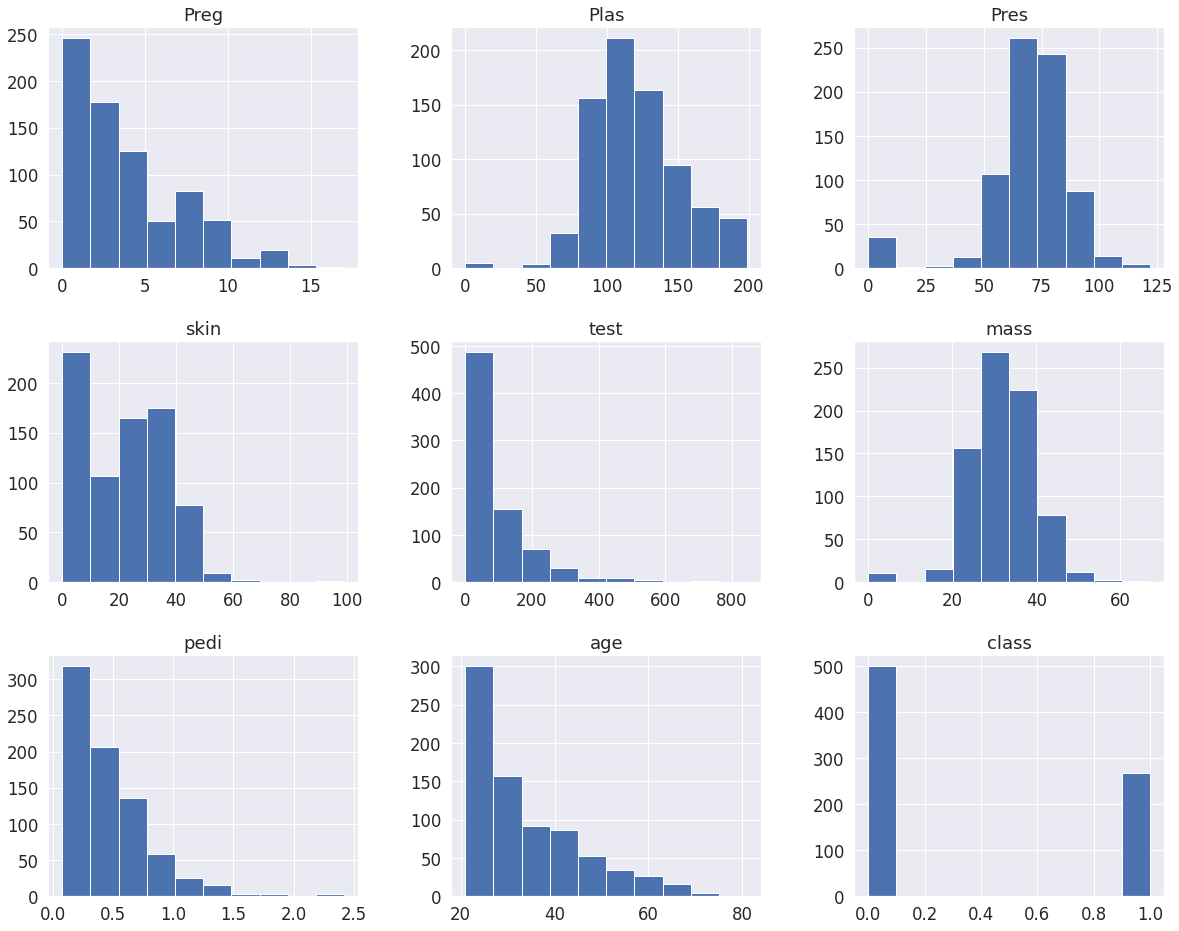

In [23]:
pima.hist(figsize = (20,16),grid=True)

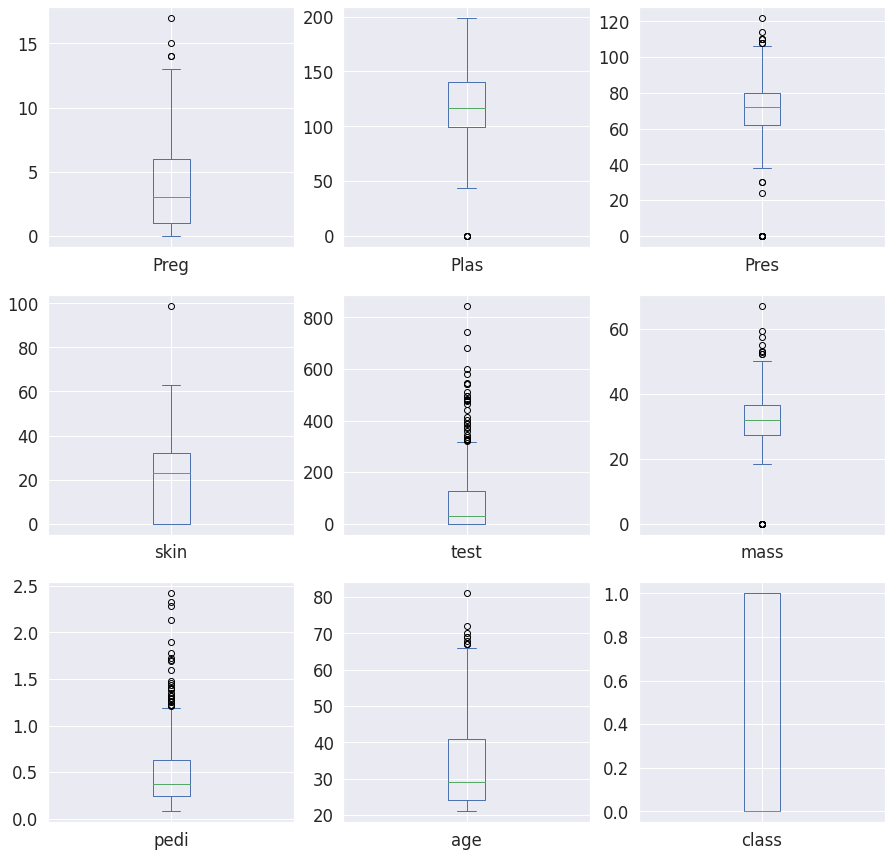

In [24]:
pima.plot(kind= 'box' , subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(15,15))
sns.set(font_scale = 1.5)

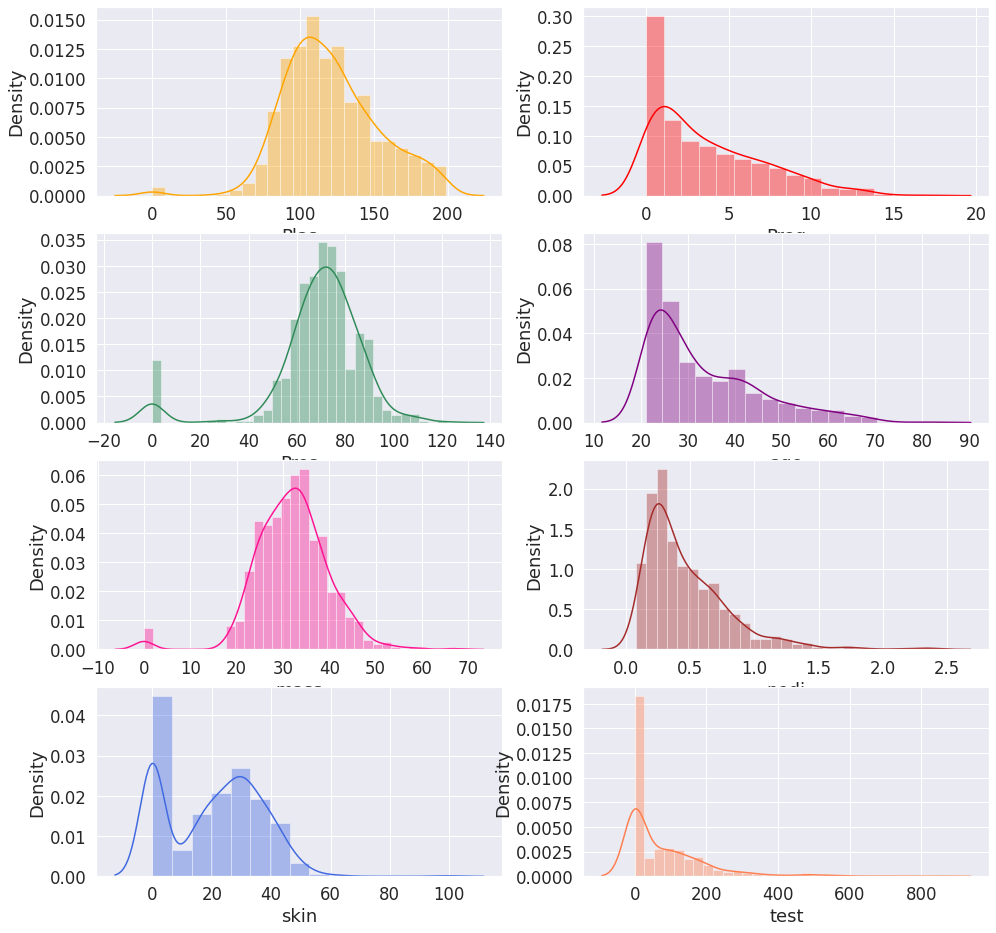

In [25]:
fig, ax = plt.subplots(4,2, figsize=(16,16))
sns.set(font_scale = 1)
sns.distplot(pima.Plas, ax = ax[0,0], color = 'orange')
sns.distplot(pima.Preg, ax = ax[0,1], color = 'red')
sns.distplot(pima.Pres, ax = ax[1,0], color = 'seagreen')
sns.distplot(pima.age, ax = ax[1,1], color = 'purple')
sns.distplot(pima.mass, ax = ax[2,0], color = 'deeppink')
sns.distplot(pima.pedi, ax = ax[2,1], color = 'brown')
sns.distplot(pima.skin, ax = ax[3,0], color = 'royalblue')
sns.distplot(pima.test, ax = ax[3,1], color = 'coral')

In [26]:
#cleaning

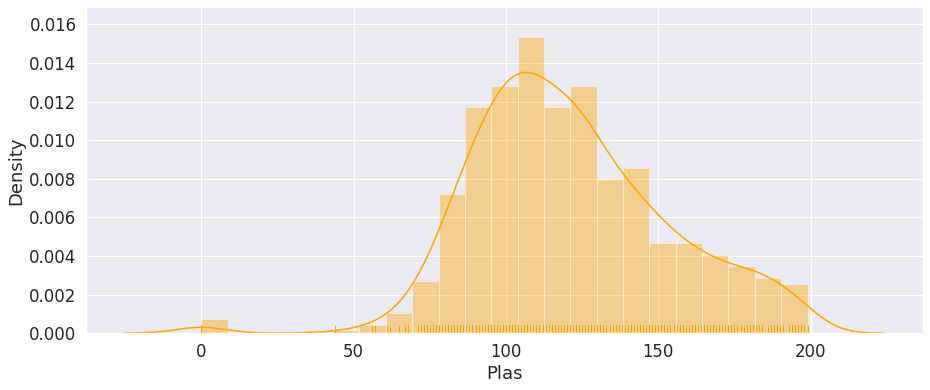

In [27]:
plt.figure(figsize=(15,6))
sns.set(font_scale = 1.5)
sns.distplot(pima['Plas'], kde = True, rug = True, color = 'orange')

In [29]:
pima_copy = pima.copy(deep = True)

In [30]:
pima_copy['Plas'].fillna(pima_copy['Plas'].mean(), inplace = True)
pima_copy['Pres'].fillna(pima_copy['Pres'].mean(), inplace = True)
pima_copy['skin'].fillna(pima_copy['skin'].median(), inplace = True)
pima_copy['test'].fillna(pima_copy['test'].median(), inplace = True)
pima_copy['mass'].fillna(pima_copy['mass'].median(), inplace = True)
print(pima_copy.isnull().sum())

Preg     0
Plas     0
Pres     0
skin     0
test     0
mass     0
pedi     0
age      0
class    0
dtype: int64


In [31]:
#cleaned data

In [32]:
pima_copy.describe().T

,count,mean,std,min,25%,50%,75%,max
Preg,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Plas,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
Pres,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
skin,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
test,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
mass,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
pedi,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
class,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


Text(0, 0.5, 'Number of People')

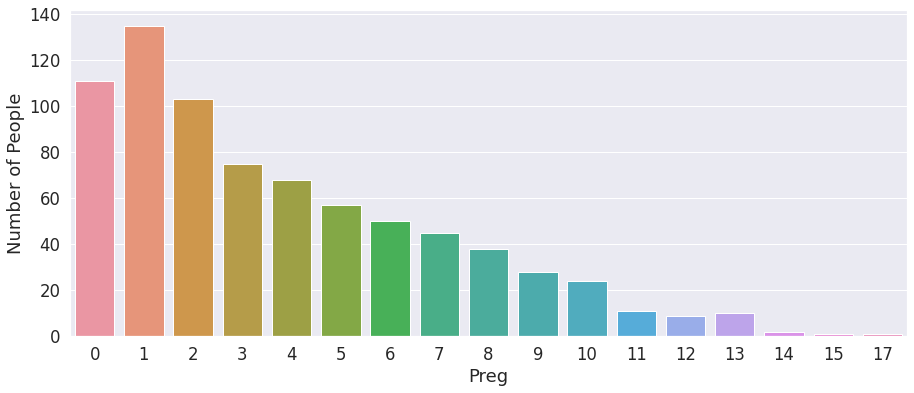

In [33]:
plt.figure(figsize=(15,6))
sns.set(font_scale = 1.5)
sns.countplot(pima_copy['Preg'])
plt.ylabel('Number of People')

In [34]:
corr = pima_copy.corr()
corr

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
Preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Plas,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
Pres,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
test,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
mass,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
pedi,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
class,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


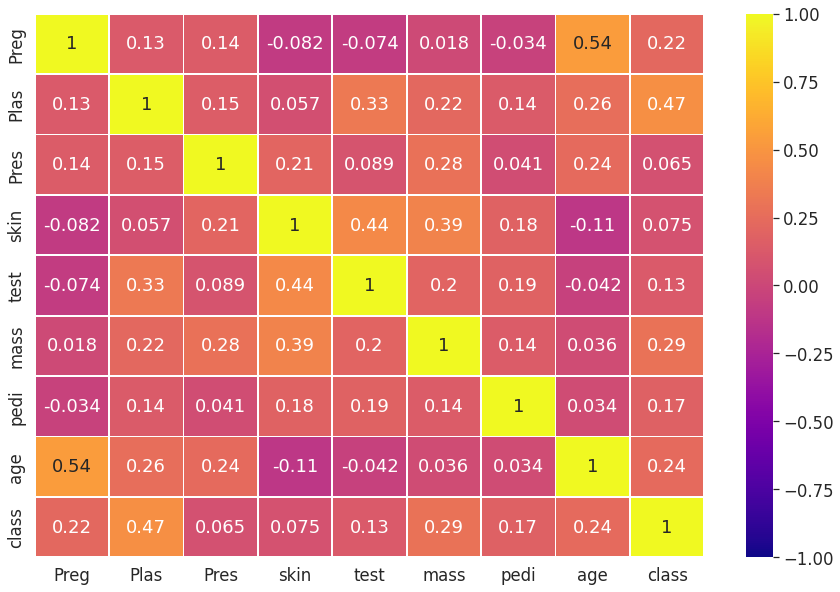

In [35]:
plt.figure(figsize=(15,10))
sns.set(font_scale = 1.5)
sns.heatmap(corr, annot = True, cmap = 'plasma', vmin = -1, vmax = 1, linecolor='white', linewidths= 1)

In [ ]:
#Pima woman who have diabetes has higher Glucose levels whereas Pima woman who does not have diabetes has lower Glucose levels

In [36]:
print('Average BMI for Pima woman who has diabetes: ', pima_copy[pima_copy['class'] == 1]['mass'].mean())

Average BMI for Pima woman who has diabetes:  35.14253731343284


In [37]:
print('Average BMI for Pima woman who does not have diabetes: ', pima_copy[pima_copy['class'] == 0]['mass'].mean())

Average BMI for Pima woman who does not have diabetes:  30.3042


In [42]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB


In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
X = pima_copy.drop('class', axis  = 1)
y = pima_copy['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 17)

In [59]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [61]:
y_pred = model.predict(X_test)

In [62]:
confusion = metrics.confusion_matrix(y_test,y_pred)
confusion

array([[136,  14],
       [ 35,  46]])

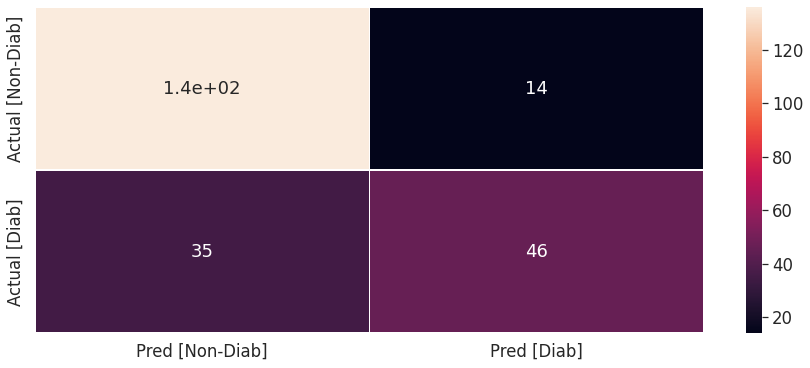

In [63]:
ylabel = ["Actual [Non-Diab]","Actual [Diab]"]
xlabel = ["Pred [Non-Diab]","Pred [Diab]"]
#sns.set(font_scale = 1.5)
plt.figure(figsize=(15,6))
sns.heatmap(confusion, annot=True, xticklabels = xlabel, yticklabels = ylabel, linecolor='white', linewidths=1)

In [64]:
print('Accuracy of Logistic Regression is: ', model.score(X_test,y_test) * 100,'%')

Accuracy of Logistic Regression is:  78.78787878787878 %


In [65]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.91      0.85       150
           1       0.77      0.57      0.65        81

    accuracy                           0.79       231
   macro avg       0.78      0.74      0.75       231
weighted avg       0.79      0.79      0.78       231



In [66]:
metrics.f1_score(y_test, y_pred)

0.6524822695035462